In [1]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.7 MB/s eta 0:00:00


In [2]:
!pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 15.0 MB/s eta 0:00:00


# **BB84 encryption Protocol**

This notebook is related to implementation of BB 84 encryption protocol.

In [7]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

Creating Alice States and Bob Basis to measure qubits.

In [8]:
n_qubits = 8

alice_basis = np.random.randint(2, size=n_qubits)
alice_state = np.random.randint(2, size=n_qubits)
bob_basis = np.random.randint(2, size=n_qubits)


print(f"Alice's State:\t {np.array2string(alice_state)}")
print(f"Alice's Bases:\t {np.array2string(alice_basis)}")
print(f"Bob's Bases:\t {np.array2string(bob_basis)}")

Alice's State:	 [0 1 1 0 0 0 1 1]
Alice's Bases:	 [1 0 1 1 1 0 0 0]
Bob's Bases:	 [0 0 0 1 0 1 0 1]


In [9]:
from qiskit import QuantumCircuit
import numpy as np

def crypto_circuit(state, basis, measurement_basis):


    num_qubits = len(state)

    qc = QuantumCircuit(num_qubits)

    # Alice prepares qubits
    for i in range(len(basis)):
        if state[i] == 1:
            qc.x(i)
        if basis[i] == 1:
            qc.h(i)
    qc.barrier()
    # Measurement performed by Bob
    for i in range(len(measurement_basis)):
        if measurement_basis[i] == 1:
            qc.h(i)

    qc.measure_all()

    return qc

In [10]:
circuit = crypto_circuit(alice_state, alice_basis, bob_basis)
backend=AerSimulator()
job=backend.run(circuit)
result=job.result()
key=result.get_counts().most_frequent()
encryption_key = ''
for i in range(n_qubits):
    if alice_basis[i] == bob_basis[i]:
         encryption_key += str(key[i])
print(f"Generated Encryption Key: {encryption_key}")

Generated Encryption Key: 111


In [11]:
print(circuit)

        ┌───┐      ░       ░ ┌─┐                     
   q_0: ┤ H ├──────░───────░─┤M├─────────────────────
        ├───┤      ░       ░ └╥┘┌─┐                  
   q_1: ┤ X ├──────░───────░──╫─┤M├──────────────────
        ├───┤┌───┐ ░       ░  ║ └╥┘┌─┐               
   q_2: ┤ X ├┤ H ├─░───────░──╫──╫─┤M├───────────────
        ├───┤└───┘ ░ ┌───┐ ░  ║  ║ └╥┘┌─┐            
   q_3: ┤ H ├──────░─┤ H ├─░──╫──╫──╫─┤M├────────────
        ├───┤      ░ └───┘ ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ┤ H ├──────░───────░──╫──╫──╫──╫─┤M├─────────
        └───┘      ░ ┌───┐ ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ───────────░─┤ H ├─░──╫──╫──╫──╫──╫─┤M├──────
        ┌───┐      ░ └───┘ ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ┤ X ├──────░───────░──╫──╫──╫──╫──╫──╫─┤M├───
        ├───┤      ░ ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├──────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘      ░ └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/══════════════════════╩══╩══╩══╩══╩══╩══╩══╩═
                            

    Alice's Part:
        Alice prepares qubits, typically by encoding them in a superposition state.
        She achieves this by applying a Hadamard gate to each qubit, inducing a state of quantum superposition wherein the qubit exists in a probabilistic combination of both 0 and 1 states.
        Following superposition, Alice measures each qubit in the computational basis, collapsing the superposition into a definite classical state.

    Bob's Part:
        Bob's role involves the measurement of qubits sent by Alice.
        To align his measurement basis with Alice's encoding, Bob applies Hadamard gates to his qubits before performing measurements.
        This step allows Bob to measure the qubits in the Hadamard basis, complementing Alice's choice of the computational basis.

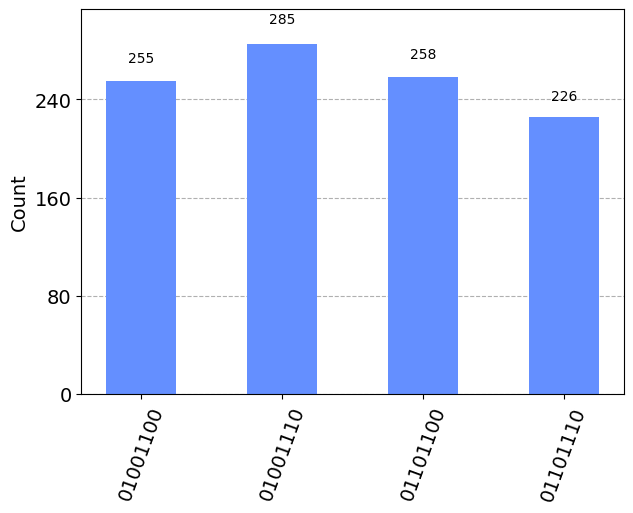

In [16]:
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts())


**The encryption key for this circuit is 000110**



The histogram shows the frequency of each possible measurement outcome for the qubits in the circuit. Each bar in the histogram represents a different measurement outcome, with the height of the bar indicating how many times that outcome was observed.

In this case, the histogram shows that the most frequent measurement outcome was "01001110", which occurred 285 times. This means that when Bob measured the qubits in the Hadamard basis, he obtained the classical bit string "01001110" with the highest probability.

This is significant because it means that Alice and Bob have successfully generated a shared secret key, which can be used to encrypt and decrypt messages. The key is secret because it is only known to Alice and Bob, and it cannot be intercepted by an eavesdropper.

The other possible measurement outcomes in the histogram are less frequent, but they still have some probability of occurring. This is because the qubits are in a quantum superposition state, which means that they can exist in multiple states simultaneously. When Bob measures the qubits, he collapses the superposition into a definite classical state, but there is still some uncertainty about which state he will observe.

Overall, the histogram provides evidence that Alice and Bob have successfully generated a shared secret key using the BB84 protocol.